In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-storm-4/Data-dictionary.xlsx
/kaggle/input/data-storm-4/DataStorm4.0_KaggleProblemStatement.pdf
/kaggle/input/data-storm-4/Store-info.csv
/kaggle/input/data-storm-4/Testing-data.csv
/kaggle/input/data-storm-4/Historical-transaction-data.csv


In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv('/kaggle/input/data-storm-4/Historical-transaction-data.csv')

In [4]:
null_counts = df.isnull().sum()

# Print the null value counts for each column
print(null_counts)

item_description    35928
transaction_date        0
invoice_id           6320
customer_id             0
shop_id                 0
item_price              0
quantity_sold           0
dtype: int64


In [5]:
unique_categories = df['item_description'].unique()
num_categories = df['item_description'].nunique()
print(unique_categories)
print(num_categories)

['ORANGE BARLEY 1.5L' 'GINGER BEER 1.5L' 'TONIC PET 500ML' 'CREAM SODA 1L'
 'STRAWBERRY MILK 180ML' 'CREAM SODA 1.5L' 'TWISTEE APPLE 1L'
 'FIT O MIXED FRUIT 200ML' 'SODA PET 1.5L' 'FIT O MIXED FRUIT 1L'
 'KIK COLA 1L' 'LEMONADE 500ML' 'FIT O ORANGE 1L' 'NECTO 1.5L'
 'LEMONADE 1.5L' 'GINGER BEER 1L' 'FIT O MANGO 200ML' 'FIT O MANGO 1L'
 'CREAM SODA 500ML' 'FIT O ORANGE 200ML' nan 'CREAM SODA APPLE POP 1L'
 'BOTTLED DRINKING WATER 500ML' 'SODA 500ML' 'GINGER BEER 500ML' 'SODA 1L'
 'NECTO 500ML' 'ORANGE CRUSH 500ML' 'BOTTLED DRINKING WATER 1.5L'
 'NECTO 1L' 'GINGER BEER SUGAR FREE 500ML' 'ORANGE CRUSH 1.5L'
 'DRY GINGER ALE PET 500ML' 'LEMONADE 1L' 'ORANGE CRUSH 1L'
 'GINGER BEER 400ML' 'CHOCOLATE MILK 180ML' 'LIME CRUSH JUICE 1L']
37


In [6]:

# extract item_name and item_size from item_description
df[['item_name', 'item_size']] = df['item_description'].str.extract('([\w\s]+) (\d*\.?\d+)\w{0,2}$')

# convert item_size to liters
df['item_size'] = df['item_size'].astype(float)
df.loc[df['item_description'].str.contains('ML', na=False), 'item_size'] /= 1000

# display the result
df.head(5)

,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold,item_name,item_size
0,ORANGE BARLEY 1.5L,2021-12-11T00:00:00.000Z,147.0,BGXA,SHOP008,220,2,ORANGE BARLEY,1.50
1,GINGER BEER 1.5L,2021-10-17T00:00:00.000Z,371.0,IA25,SHOP112,220,2,GINGER BEER,1.50
2,TONIC PET 500ML,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,160,2,TONIC PET,0.50
3,CREAM SODA 1L,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,150,2,CREAM SODA,1.00
4,STRAWBERRY MILK 180ML,2021-10-23T00:00:00.000Z,1310.0,7S00,SHOP112,210,5,STRAWBERRY MILK,0.18


In [7]:
df2 = pd.read_csv('/kaggle/input/data-storm-4/Store-info.csv')

# Merge the two DataFrames on the primary key column
df = pd.merge(df, df2, on='shop_id')


In [8]:
new_order = ['transaction_date','invoice_id','customer_id','shop_id','item_name','item_size','item_price','quantity_sold', 'shop_area_sq_ft', 'shop_profile']

# Reorder the columns in the dataframe
df = df[new_order]

### Feature Scaling

In [9]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Sample dataset
for i in df:
    if i not in ['transaction_date','invoice_id','customer_id','shop_id','item_name','shop_profile']:
        col_data = df[i]

    # Perform min-max scaling on the selected column
        scaled_data = (col_data - col_data.min()) / (col_data.max() - col_data.min())

        # Update the selected column in the original data frame with the scaled data
        df[i] = scaled_data

In [10]:
unique_categories = df['item_name'].unique()
num_categories = df['item_name'].nunique()
print(unique_categories)
print(num_categories)

['ORANGE BARLEY' 'TONIC PET' 'CREAM SODA' 'GINGER BEER'
 'CREAM SODA APPLE POP' 'SODA' 'BOTTLED DRINKING WATER' 'LEMONADE'
 'KIK COLA' 'STRAWBERRY MILK' 'SODA PET' 'FIT O MIXED FRUIT' nan 'NECTO'
 'FIT O ORANGE' 'FIT O MANGO' 'GINGER BEER SUGAR FREE' 'ORANGE CRUSH'
 'CHOCOLATE MILK' 'TWISTEE APPLE' 'DRY GINGER ALE PET' 'LIME CRUSH JUICE']
21


In [11]:
column_to_encode = 'item_name'
encoded_df=df.copy()

# Perform one-hot encoding on the selected column
one_hot_encoded = pd.get_dummies(encoded_df[column_to_encode], prefix=column_to_encode)

# Add the one-hot encoded columns to the original DataFrame
encoded_df = pd.concat([encoded_df, one_hot_encoded], axis=1)

# Drop the original column that was one-hot encoded
encoded_df = encoded_df.drop(column_to_encode, axis=1)

# Save the updated DataFrame to a new CSV file
# df.to_csv('output.csv', index=False)
encoded_df.head()

,transaction_date,invoice_id,customer_id,shop_id,item_size,item_price,quantity_sold,shop_area_sq_ft,shop_profile,item_name_BOTTLED DRINKING WATER,...,item_name_LEMONADE,item_name_LIME CRUSH JUICE,item_name_NECTO,item_name_ORANGE BARLEY,item_name_ORANGE CRUSH,item_name_SODA,item_name_SODA PET,item_name_STRAWBERRY MILK,item_name_TONIC PET,item_name_TWISTEE APPLE
0,2021-12-11T00:00:00.000Z,147.0,BGXA,SHOP008,1.000000,0.010654,0.029412,0.487805,Moderate,0,...,0,0,0,1,0,0,0,0,0,0
1,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,0.242424,0.007198,0.029412,0.487805,Moderate,0,...,0,0,0,0,0,0,0,0,1,0
2,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,0.621212,0.006623,0.029412,0.487805,Moderate,0,...,0,0,0,0,0,0,0,0,0,0
3,2021-12-10T00:00:00.000Z,1000053.0,VT9C,SHOP008,1.000000,0.010654,0.019608,0.487805,Moderate,0,...,0,0,0,0,0,0,0,0,0,0
4,2021-12-10T00:00:00.000Z,1000057.0,8QLS,SHOP008,1.000000,0.023323,0.019608,0.487805,Moderate,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
grouped_df=df.copy()
grouped_df['total']  = grouped_df.groupby(['item_name'])['quantity_sold'].transform('sum')
grouped_df.head()

,transaction_date,invoice_id,customer_id,shop_id,item_name,item_size,item_price,quantity_sold,shop_area_sq_ft,shop_profile,total
0,2021-12-11T00:00:00.000Z,147.0,BGXA,SHOP008,ORANGE BARLEY,1.000000,0.010654,0.029412,0.487805,Moderate,625.362745
1,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,TONIC PET,0.242424,0.007198,0.029412,0.487805,Moderate,432.960784
2,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,CREAM SODA,0.621212,0.006623,0.029412,0.487805,Moderate,2094.392157
3,2021-12-10T00:00:00.000Z,1000053.0,VT9C,SHOP008,GINGER BEER,1.000000,0.010654,0.019608,0.487805,Moderate,2683.676471
4,2021-12-10T00:00:00.000Z,1000057.0,8QLS,SHOP008,GINGER BEER,1.000000,0.023323,0.019608,0.487805,Moderate,2683.676471


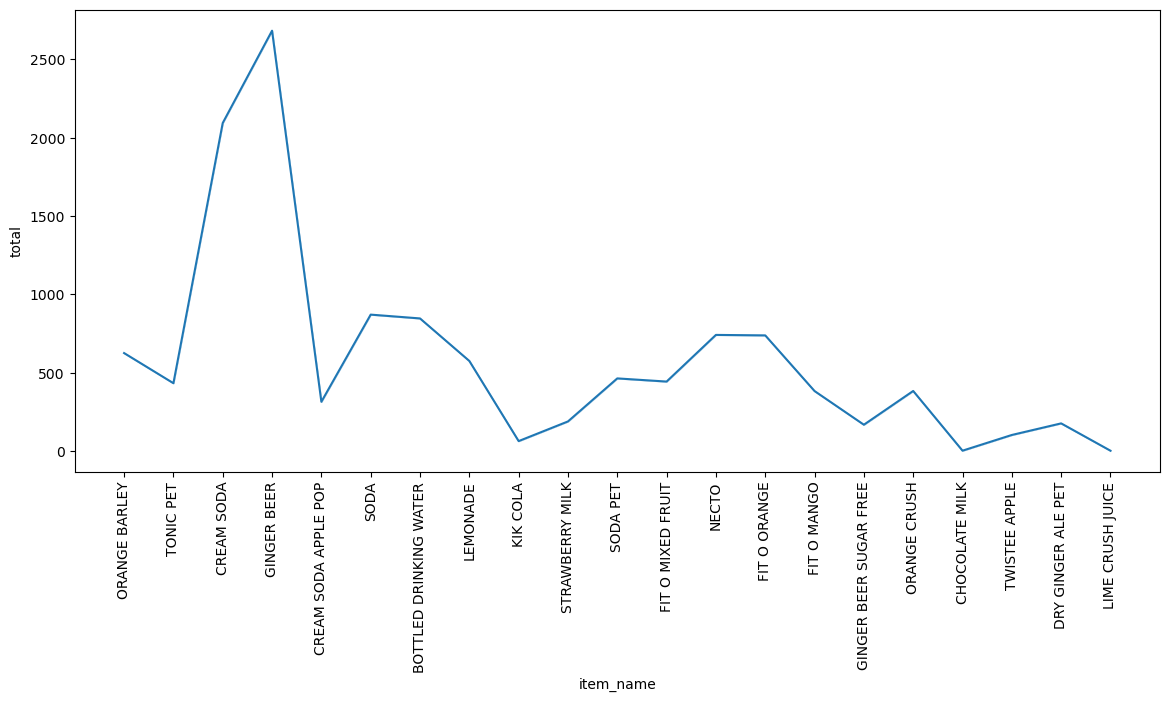

In [13]:


# Load the dataset into a pandas DataFrame

# Create a line plot using seaborn
plt.figure(figsize=(14,6))
sns.lineplot(x='item_name', y='total', data=grouped_df)
plt.xticks(rotation=90)

# Add axis labels and a title to th

# Show the plot
plt.show()

In [14]:
filtered_df = encoded_df[encoded_df['shop_profile'].notnull()]

In [15]:
# import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the CSV file into a pandas DataFrame
# df = pd.read_csv('filename.csv')

# Create a LabelEncoder object
le = LabelEncoder()

# Fit the LabelEncoder on the column and transform the column
#filtered_df['column_name_encoded'] = le.fit_transform(filtered_df["shop_profile"])

# Save the updated DataFrame to a new CSV file
# filtered_df.to_csv('filename_encoded.csv', index=False)

# define the mapping between original and encoded values
mapping = {'Moderate': 1, 'Low': 0, 'High': 2}

# fit the encoder to the 'shopprofile' column using the mapping
le.fit([mapping[val] for val in filtered_df['shop_profile']])

# transform the 'shopprofile' column using the fitted encoder
filtered_df['shop_profile_encoded'] = le.transform([mapping[val] for val in filtered_df['shop_profile']])


filtered_df.head()

,transaction_date,invoice_id,customer_id,shop_id,item_size,item_price,quantity_sold,shop_area_sq_ft,shop_profile,item_name_BOTTLED DRINKING WATER,...,item_name_LIME CRUSH JUICE,item_name_NECTO,item_name_ORANGE BARLEY,item_name_ORANGE CRUSH,item_name_SODA,item_name_SODA PET,item_name_STRAWBERRY MILK,item_name_TONIC PET,item_name_TWISTEE APPLE,shop_profile_encoded
0,2021-12-11T00:00:00.000Z,147.0,BGXA,SHOP008,1.000000,0.010654,0.029412,0.487805,Moderate,0,...,0,0,1,0,0,0,0,0,0,1
1,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,0.242424,0.007198,0.029412,0.487805,Moderate,0,...,0,0,0,0,0,0,0,1,0,1
2,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,0.621212,0.006623,0.029412,0.487805,Moderate,0,...,0,0,0,0,0,0,0,0,0,1
3,2021-12-10T00:00:00.000Z,1000053.0,VT9C,SHOP008,1.000000,0.010654,0.019608,0.487805,Moderate,0,...,0,0,0,0,0,0,0,0,0,1
4,2021-12-10T00:00:00.000Z,1000057.0,8QLS,SHOP008,1.000000,0.023323,0.019608,0.487805,Moderate,0,...,0,0,0,0,0,0,0,0,0,1


In [16]:
X=filtered_df.drop(columns=['transaction_date','invoice_id','customer_id','shop_id','shop_profile','shop_profile_encoded'])
y=filtered_df["shop_profile_encoded"]

### Outliers

In [17]:
# def count_outliers(col_data):
#     Q1 = col_data.quantile(0.25)
#     Q3 = col_data.quantile(0.75)

#     # Calculate the interquartile range (IQR)
#     IQR = Q3 - Q1

#     # Define the threshold for outliers (1.5 times the IQR)
#     threshold = 1.5 * IQR

#     # Identify the outliers
#     outliers = col_data[(col_data < Q1 - threshold) | (col_data > Q3 + threshold)]

#     # Count the number of outliers
#     num_outliers = len(outliers)

#     print("Number of outliers in column", ":", num_outliers)



In [18]:
X = X.fillna(0)
X.head()

,item_size,item_price,quantity_sold,shop_area_sq_ft,item_name_BOTTLED DRINKING WATER,item_name_CHOCOLATE MILK,item_name_CREAM SODA,item_name_CREAM SODA APPLE POP,item_name_DRY GINGER ALE PET,item_name_FIT O MANGO,...,item_name_LEMONADE,item_name_LIME CRUSH JUICE,item_name_NECTO,item_name_ORANGE BARLEY,item_name_ORANGE CRUSH,item_name_SODA,item_name_SODA PET,item_name_STRAWBERRY MILK,item_name_TONIC PET,item_name_TWISTEE APPLE
0,1.000000,0.010654,0.029412,0.487805,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0.242424,0.007198,0.029412,0.487805,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0.621212,0.006623,0.029412,0.487805,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.000000,0.010654,0.019608,0.487805,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.000000,0.023323,0.019608,0.487805,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
from sklearn.model_selection import train_test_split

y = filtered_df['shop_profile_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=50)

In [20]:
X_train.head(5)

,item_size,item_price,quantity_sold,shop_area_sq_ft,item_name_BOTTLED DRINKING WATER,item_name_CHOCOLATE MILK,item_name_CREAM SODA,item_name_CREAM SODA APPLE POP,item_name_DRY GINGER ALE PET,item_name_FIT O MANGO,...,item_name_LEMONADE,item_name_LIME CRUSH JUICE,item_name_NECTO,item_name_ORANGE BARLEY,item_name_ORANGE CRUSH,item_name_SODA,item_name_SODA PET,item_name_STRAWBERRY MILK,item_name_TONIC PET,item_name_TWISTEE APPLE
60990,0.242424,0.007198,0.029412,0.558408,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
263998,0.015152,0.025626,0.088235,0.409499,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
432947,0.621212,0.006623,0.019608,1.000000,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
451199,1.000000,0.010654,0.029412,0.322208,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16234,0.242424,0.006623,0.019608,0.554557,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

# Load the dataset into a pandas dataframe
# df = pd.read_csv('dataset.csv')

# # Split the dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1), df['target'], test_size=0.3)

# Create a decision tree classifier object
clf = DecisionTreeClassifier()

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")

Accuracy: 0.7379969024264327


In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd


knn = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Predict the classes of the test data
y_pred = knn.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7085699535363965


In [23]:
test_df = encoded_df[encoded_df['shop_profile'].isnull()]
X_train=filtered_df.drop(columns=['transaction_date','invoice_id','customer_id','shop_id','shop_profile','shop_profile_encoded'])
y_train=filtered_df["shop_profile_encoded"]
X_test=test_df.drop(columns=['transaction_date','invoice_id','customer_id','shop_id','shop_profile'])

In [24]:
print(test_df.shape[0])
print(X_test.shape[0])

86633
86633


In [25]:
X_train.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)

In [26]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Load data from CSV file

# Train a Random Forest classifier with default parameters
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = rfc.predict(X_test)

In [27]:
# Convert the numpy array to a dataframe with column name "y_pred"
df_3 = pd.DataFrame({'y_pred': y_pred})



df_3

,y_pred
0,1
1,1
2,1
3,1
4,1
...,...
86628,1
86629,1
86630,1
86631,1


In [28]:
test_df = test_df.reset_index(drop=True)
test_df

,transaction_date,invoice_id,customer_id,shop_id,item_size,item_price,quantity_sold,shop_area_sq_ft,shop_profile,item_name_BOTTLED DRINKING WATER,...,item_name_LEMONADE,item_name_LIME CRUSH JUICE,item_name_NECTO,item_name_ORANGE BARLEY,item_name_ORANGE CRUSH,item_name_SODA,item_name_SODA PET,item_name_STRAWBERRY MILK,item_name_TONIC PET,item_name_TWISTEE APPLE
0,2021-10-17T00:00:00.000Z,27928.0,XKPA,SHOP087,1.000000,0.010654,0.029412,0.293967,NaN,0,...,0,0,0,1,0,0,0,0,0,0
1,2021-10-19T00:00:00.000Z,28399.0,HQPX,SHOP087,1.000000,0.007198,0.029412,0.293967,NaN,0,...,0,0,0,0,0,0,1,0,0,0
2,2021-10-22T00:00:00.000Z,28822.0,N60S,SHOP087,0.621212,0.004319,0.029412,0.293967,NaN,0,...,0,0,0,0,0,1,0,0,0,0
3,2021-10-22T00:00:00.000Z,28822.0,N60S,SHOP087,1.000000,0.010654,0.029412,0.293967,NaN,0,...,0,0,0,1,0,0,0,0,0,0
4,2021-10-26T00:00:00.000Z,29439.0,ML0Z,SHOP087,1.000000,0.010654,0.029412,0.293967,NaN,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86628,2021-10-19T00:00:00.000Z,4399656.0,7BDD,SHOP002,1.000000,0.023323,0.029412,0.435173,NaN,0,...,0,0,0,0,0,0,0,0,0,0
86629,2021-11-16T00:00:00.000Z,4403093.0,LY6B,SHOP002,0.621212,0.014685,0.029412,0.435173,NaN,0,...,0,0,0,0,0,0,0,0,0,0
86630,2021-11-17T00:00:00.000Z,4403334.0,80D4,SHOP002,0.242424,0.007198,0.019608,0.435173,NaN,0,...,0,0,0,0,0,0,0,0,1,0
86631,2021-12-12T00:00:00.000Z,4406596.0,LZE4,SHOP002,1.000000,0.010654,0.019608,0.435173,NaN,0,...,1,0,0,0,0,0,0,0,0,0


In [29]:
result_df = pd.concat([test_df, df_3], axis=1)

In [30]:
new_df =result_df.loc[:, ["shop_id", "y_pred"]]
new_df

,shop_id,y_pred
0,SHOP087,1
1,SHOP087,1
2,SHOP087,1
3,SHOP087,1
4,SHOP087,1
...,...,...
86628,SHOP002,1
86629,SHOP002,1
86630,SHOP002,1
86631,SHOP002,1


In [31]:
mode_df = new_df.groupby('shop_id')['y_pred'].apply(lambda x: x.mode()[0]).reset_index()


In [32]:
mode_df=mode_df.replace([0,1,2],["Low","Moderate","High"])

In [33]:
mode_df = mode_df.rename(columns={'y_pred': 'shop_profile'})

In [34]:
df_2=pd.read_csv("/kaggle/input/data-storm-4/Testing-data.csv")
df_2.drop("shop_profile", axis =1, inplace = True)
merged_df = pd.merge(df_2, mode_df, on='shop_id')

In [35]:
merged_df.head()

,shop_id,shop_profile
0,SHOP046,Low
1,SHOP024,Low
2,SHOP023,Moderate
3,SHOP097,Moderate
4,SHOP044,Low


In [36]:
merged_df.to_csv("Submission2.csv",index=False)